In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
%matplotlib inline

In [2]:
#READ THE CSV FILES
crime = pd.read_csv("Crimes_2012_to_2015.csv")
census_areas = pd.read_csv("community_area_to_census.csv")

In [3]:
#Choose the columns needed
census_areas = census_areas[['Community_Number','Community', 'Public Use Area',]]
census_areas.head()

,Community_Number,Community,Public Use Area
0,1,Rogers Park,"Chicago City (North)--Edgewater, Uptown & Roge..."
1,2,West Ridge,"Chicago City (North)--West Ridge, Lincoln Squa..."
2,3,Uptown,"Chicago City (North)--Edgewater, Uptown & Roge..."
3,4,Lincoln Square,"Chicago City (North)--West Ridge, Lincoln Squa..."
4,5,North Center,"Chicago City (North)--West Ridge, Lincoln Squa..."


In [4]:
#Choose the columns needed
crime = crime[['ID', 'Case Number', 'Date_Time', 'Description', 'Updated On', 'Community Area']]
crime.head()

,ID,Case Number,Date_Time,Description,Updated On,Community Area
0,10433096,HZ170962,1/1/2012 0:00,AGG CRIMINAL SEXUAL ABUSE,5/11/2016 15:48,19.0
1,10433124,HZ170983,1/1/2012 0:00,SEXUAL EXPLOITATION OF A CHILD,5/11/2016 15:48,19.0
2,10532867,HZ276514,1/1/2012 0:00,CRIMINAL SEXUAL ABUSE,5/26/2016 15:51,35.0
3,10536876,HZ280873,1/1/2012 0:00,FINANCIAL IDENTITY THEFT OVER $ 300,5/27/2016 15:48,66.0
4,11244255,JB169720,1/1/2012 0:01,AGG CRIMINAL SEXUAL ABUSE,3/2/2018 15:54,19.0


In [5]:
#Merge COMMUNITY CENSUS data to the CRIMES data
updated_data = pd.merge(crime, census_areas, how='left', left_on="Community Area", right_on="Community_Number")

In [6]:
updated_data.head()

,ID,Case Number,Date_Time,Description,Updated On,Community Area,Community_Number,Community,Public Use Area
0,10433096,HZ170962,1/1/2012 0:00,AGG CRIMINAL SEXUAL ABUSE,5/11/2016 15:48,19.0,19.0,Belmont Cragin,"Chicago City (West)--Austin, Belmont Cragin & ..."
1,10433124,HZ170983,1/1/2012 0:00,SEXUAL EXPLOITATION OF A CHILD,5/11/2016 15:48,19.0,19.0,Belmont Cragin,"Chicago City (West)--Austin, Belmont Cragin & ..."
2,10532867,HZ276514,1/1/2012 0:00,CRIMINAL SEXUAL ABUSE,5/26/2016 15:51,35.0,35.0,Douglas,"Chicago City (South)--South Shore, Hyde Park, ..."
3,10536876,HZ280873,1/1/2012 0:00,FINANCIAL IDENTITY THEFT OVER $ 300,5/27/2016 15:48,66.0,66.0,Chicago Lawn,"Chicago City (South)--Chicago Lawn, Englewood/..."
4,11244255,JB169720,1/1/2012 0:01,AGG CRIMINAL SEXUAL ABUSE,3/2/2018 15:54,19.0,19.0,Belmont Cragin,"Chicago City (West)--Austin, Belmont Cragin & ..."


In [7]:
#Sort with respect to the UPDATED ON column to match the list
updated_data = updated_data.sort_values(["Public Use Area"]).reset_index(drop=True)

In [8]:
# Count the number of CRIMES that are UPDATED
updatecount = len(crime["Updated On"])
print(updatecount)

199862


In [9]:
crime['Community Area'].describe()

count    199858.000000
mean         37.521545
std          21.426186
min           0.000000
25%          23.000000
50%          32.000000
75%          57.000000
max          77.000000
Name: Community Area, dtype: float64

In [10]:
#Most updated Crimes by Crime Description
most_updated_crimes = pd.DataFrame(updated_data['Description'].value_counts()[1:25])
most_updated_crimes

,Description
$500 AND UNDER,18923
DOMESTIC BATTERY SIMPLE,18826
TO VEHICLE,11247
TO PROPERTY,10467
OVER $500,9983
FROM BUILDING,7041
POSS: CANNABIS 30GMS OR LESS,6904
RETAIL THEFT,6458
FORCIBLE ENTRY,6388
AUTOMOBILE,6360


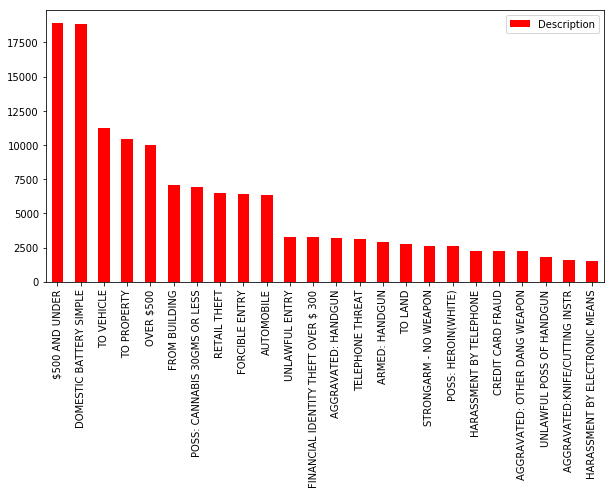

In [11]:
#Plot the Graph
fig = plt.figure(figsize = (10,5))
most_updated_crimes.plot(kind = 'bar', color='r', ax = plt.gca())

In [12]:
#Most Updated Crimes by Public Use Area
most_updated_area = pd.DataFrame(updated_data['Community'].value_counts()[1:25])
most_updated_area

,Community
Near North Side,6981
South Shore,6758
North Lawndale,6313
Near West Side,6175
Humboldt Park,6092
Auburn Gresham,5942
Loop,5931
West Englewood,5605
West Town,5491
Englewood,5403


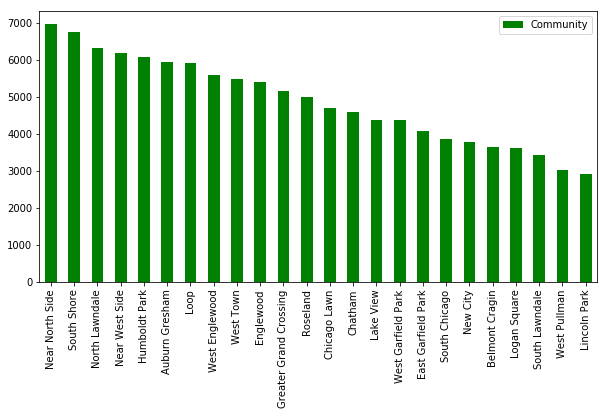

In [13]:
#Plot the Graphs
fig = plt.figure(figsize = (10,5))
most_updated_area.plot(kind = 'bar', color='green', ax = plt.gca())